**Name: Yutika Rege**	   					                                                                       

**Date: 06-07-2021** 

**PRN: 1901202012**

**School: Data Science**

**Program: B.Sc. Data Science**

**Year/ Semester: 2nd / 4th**

**Subject Name: Machine Learning 2**

**Subject Code: DS401**

**Title: Application of Regression analysis on MT cars dataset..**

**Skills/Competencies to be acquired:**

1.	Application of regression 

2.	Feature selection

3.	Exploratory data analysis


**Duration of activity: 1 Hour**


**1.	What is the purpose of this activity?**

The purpose of this activity is to apply regression analysis on the Motor Trends’ Cars dataset.

**2.	Steps performed in this activity.**

1. Import the required modules and read the data.

2. Perform statistical as well as visual EDA over the data.

3. Find correlations using a heatmap.

4. Split the data in independent and dependent features.

5. Split the data into an 80 : 20  ::  train : test ratio.

6. Train a model on all independent features then another with only a few features.

7. Note the output.


**3.	What resources / materials / equipment / tools did you use for this activity?**

•	Jupyter Notebook 

•	Lecture notes 

•	Google, Google Meet

•	MS Word, MS Excel 

•	Websites: W3Resources, Towards Data Science 

**4.	What skills did you acquire?**

•	Able to apply linear regression to predict a numeric outcome.

•	Able to select features using a correlation matrix based on degree of correlation.

•	Able to perform EDA and derive actionable insights.


**5.	Time taken to complete the activity?**

1 Hour.


-------------------------------------------------------------------------------------------------------------------------------

**Importing all the necessary modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

**Reading the dataset:**

In [2]:
df = pd.read_csv("C://Users//Yutika//Downloads//mtcars.csv")
df.head()

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**Exploratory Data Analysis:**

**1) Checking for missing values:**

In [3]:
print(f"There are {df.isna().sum().sum()} missing values")

There are 0 missing values


**Comment:** There are no missing values in the dataset.

**2) Column names:**

In [4]:
cn = pd.DataFrame(df.columns,columns=["Column name"])
cn

,Column name
0,Model
1,mpg
2,cyl
3,disp
4,hp
5,drat
6,wt
7,qsec
8,vs
9,am


**3) Checking for shape of the dataset:**

In [5]:
print(f"Shape:\n\nRows   : {df.shape[0]}\nColumns: {df.shape[1]}")

Shape:

Rows   : 32
Columns: 12


**4) Checking the data types by creating a separate dataframe:**

In [6]:
dt = pd.DataFrame(df.dtypes,columns=["Data type"])
dt[dt["Data type"]=="object"]

,Data type
Model,object


In [7]:
dt[dt["Data type"]=="float64"]

,Data type
mpg,float64
disp,float64
drat,float64
wt,float64
qsec,float64


In [8]:
dt[dt["Data type"]=="int64"]

,Data type
cyl,int64
hp,int64
vs,int64
am,int64
gear,int64
carb,int64


**Comment:** There are 11 variables which are numeric out of which 5 are of 'float64' type and 6 of 'int64'. Only one variable "Model" is of 'object' data type.

**5) Descriptive stats:**

In [9]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


**6) Finding unique values of the Model variable:**

In [10]:
df["Model"].unique()

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

**Visual EDA:**

In [11]:
box = df.iloc[:,5:]

Text(0, 0.5, 'Features')

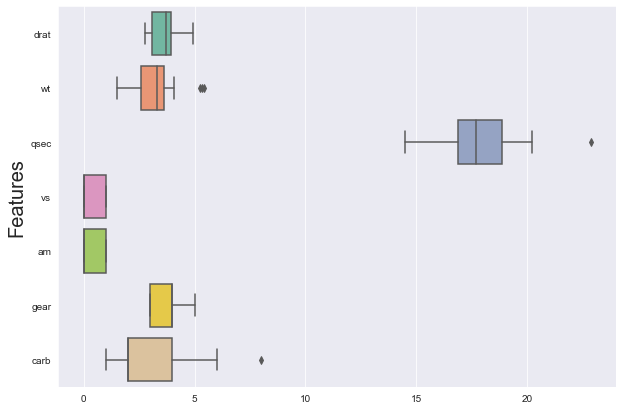

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(data=box,orient="h",palette="Set2")
plt.ylabel("Features",size=20)

In [13]:
box1 = df.iloc[:,3:5]

Text(0, 0.5, 'Features')

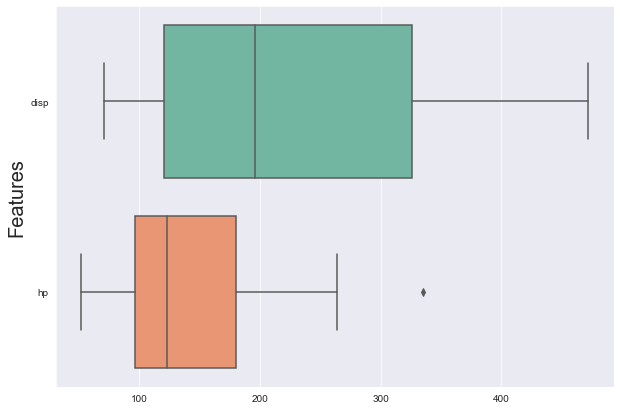

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(data=box1,orient="h",palette="Set2")
plt.ylabel("Features",size=20)

**Comment:** Here we plotted the 2 boxplots separately because of varying magnitudes. There are a few outliers in some variables which are not extreme but are necessary. We would be keeping those.

Text(0.5, 1.0, 'Density plot for MPG')

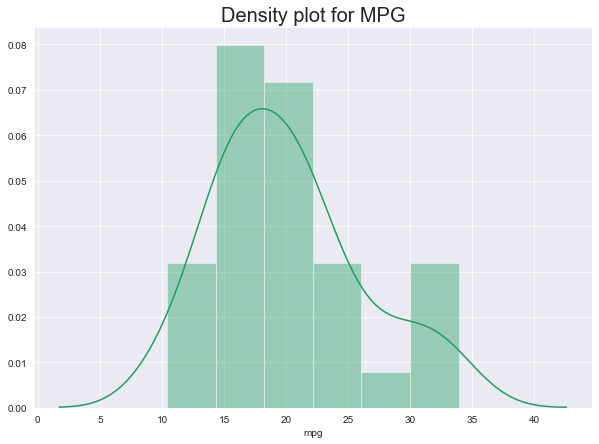

In [15]:
plt.figure(figsize=(10,7))
sns.distplot(df["mpg"],color="#1f9d60")
plt.title("Density plot for MPG",size=20)

In [16]:
from scipy.stats import kurtosis, skew
k = kurtosis(df["mpg"])
s = skew(df["mpg"])
print(f"Skewness:  {round(s,4)}\nKurtosis: {round(k,4)}")

Skewness:  0.6404
Kurtosis: -0.2005


**Comment:** From the chart and our statistical tests of skewness and kurtosis above, it can be concluded that the variable mpg follows a slightly right skewed and platykurtic distribution.

**Heatmap for correlation:**

Text(0.5, 1.0, 'Heatmap to  find correlation among the variables')

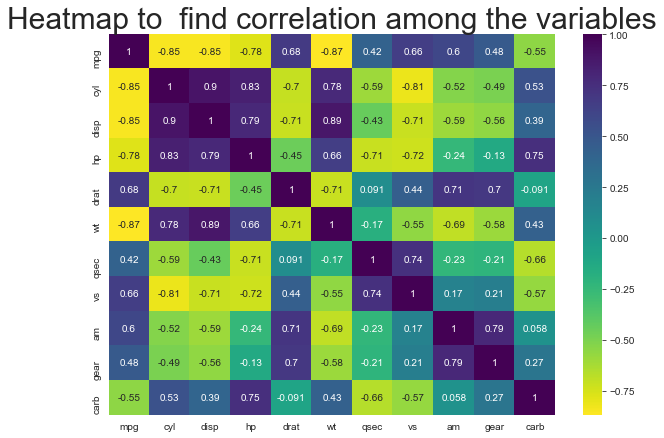

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap="viridis_r",annot=True)
plt.title("Heatmap to  find correlation among the variables",size=30)

**Comment:** The variables drat, qsec, vs, am and gear have a strong positive correlation with our target variable mpg whereas the others have a stark negative correlation.

**Importing the modules for facilitating Linear Regression:**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Going with the all-in feature selection method first:**

In [19]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
lr.intercept_

12.842185655411281

In [24]:
coef_df = pd.DataFrame(lr.coef_,X.columns,columns=["Coefficients"])
coef_df

,Coefficients
cyl,-0.576988
disp,0.034939
hp,-0.034652
drat,0.985280
wt,-5.162430
qsec,0.910767
vs,1.557779
am,2.880111
gear,0.300564
carb,0.501446


In [25]:
r2 = metrics.r2_score(y_test,y_pred)
print(f"The model with 'all features in' approach produces {round(r2*100,2)} % R^2 value.")

The model with 'all features in' approach produces 76.99 % R^2 value.


**Using only a few features (the ones with the highest +ve corr. with mpg):**

In [26]:
X1 = df[['drat','qsec','vs','am']]
y1 = df.iloc[:,1]

In [27]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)

In [28]:
lr1 = LinearRegression()
lr1.fit(X1_train,y1_train)

LinearRegression()

In [29]:
y1_pred = lr1.predict(X1_test)

In [30]:
lr1.intercept_

-14.688858794994132

In [31]:
coef_df1 = pd.DataFrame(lr1.coef_,X1.columns,columns=["Coefficients"])
coef_df1

,Coefficients
drat,2.961336
qsec,1.167925
vs,2.612869
am,6.184051


In [32]:
r2_1 = metrics.r2_score(y1_test,y1_pred)
print(f"The model with a few features produces {round(r2_1*100,2)} % R^2 value.")

The model with a few features produces 58.97 % R^2 value.


**Comment:** We can thus conclude that with all features in consideration, the model "lr" is able to produce more accuracy as opposed to the model "lr1" with only a few features. 